# **CLAIMS CLASSIFICATION PROJECT**
**Milestone 3 - Exploratory Data Analysis (EDA)**

So far, I’ve completed a project proposal and used Python to inspect and organize the video company's dataset.

The client is requesting my assistance with some Exploratory Data Analysis (EDA) and data visualization. Their management team asked to see a Python notebook showing data structuring and cleaning, as well as any matplotlib/seaborn visualizations plotted to help them understand the data. At the very least, I should include a graph comparing claim counts to opinion counts, as well as boxplots of the most important variables (like “video duration,” “video like count,” “video comment count,” and “video view count”) to check for outliers. Also, I should include a breakdown of “author ban status” counts.

Additionally, the management team has recently asked all EDA to include Tableau visualizations, as they find them particularly helpful in status reports to them. For this data, I will create a Tableau dashboard showing a simple claims versus opinions count, as well as stacked bar charts of claims versus opinions for variables like 'video_view_counts', 'video_like_counts', 'video_share_counts', and 'video_download_counts'. I must make sure it is easy to understand to someone who isn’t data savvy, and I must remember that the assistant director is a person with visual impairments.

A notebook was structured and prepared to help me in this project milestone. It includes questions that will help me prepare the executive summary from this project milestone.

In this activity, I will examine data provided and prepare it for analysis. I will also design a professional data visualization that tells a story, and will help data-driven decisions for business needs.


**The purpose** of this project milestone is to conduct Exploratory Data Analysis on a provided data set. My mission is to continue the investigation I began in Project Milestone 2 and perform further EDA on this data with the aim of learning more about the variables. Of particular interest is information related to what distinguishes claim videos from opinion videos.

**The goal** is to explore the dataset and create visualizations.

*I divided this activity in 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
Data cleaning


**Part 3:** Build visualizations

**Part 4:** Evaluate and share results

I must consider the following questions:
1. Identify any outliers:
*   What methods are best for identifying outliers?
*   How do I make the decision to keep or exclude outliers from any future models?



Best methods for identifying outliers are:
- using numpy functions to investigate the mean() and median() of the data and understand range of data values,
- plotting boxplot to visualize the distribution of data.
_
There are three main options for dealing with outliers: keeping them as they are, deleting them, or reassigning them. Whether I keep outliers as they are, delete them, or reassign values is a decision that I make on a dataset-by-dataset basis, according to what my goals are for the model I'm planning to construct. To help me make the decision, I can start with these general guidelines:- *
Delete them* Iff 'me sure the outliers are mistakes, typos, or errors and the dataset will be used for modeling or machine learning, hetn 'me more likely to decide to delete outliers. Of the three choiesc, u’ll use this one the lest .- *
Reassign the*m: If the dataset is small and/or the data will be used for modeling or machine learng, it'sre more likely to choose a path of deriving new values to replace the outlier lues s- *.
Leave th*em: For a dsat Iplu plan to do EDA/analysis on and nothing else, or fora  asetdre preparing for a model that is resistant to outliers, it is most likehI'mare going to leae em..e. For Linear Regression models, outliers can significantly skew the model, but Random Forest and XGBoost modeare ls resistive to outliers.  

### **Task 1. Imports, links, and loading**

For EDA of the data, first I'll import the packages that would be most helpful.


In [569]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

Then, I'll load the dataset into a dataframe.

In [571]:
# Load dataset into dataframe
data = pd.read_csv("video_dataset.csv")

### **Task 2a: Data exploration and cleaning**

In [573]:
# Display and examine the first few rows of the dataframe
data.head()


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [574]:
# Get the size of the data
data.size

232584

In [575]:
# Get the shape of the data
data.shape


(19382, 12)

Get basic information about the data, using `.info()`.

In [577]:
# Get basic information about the data
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [578]:
# Generate a table of descriptive statistics
data.describe()


,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


### **Task 2b. Select visualization type(s)**

I'll select data visualization types that will help me understand and explain the data.

Now that I know that I’ll use the following data columns: “video_duration_sec,” “video_like_count,” “video_comment_count,”, “video_view_count”, "claim_status", I'll check them for outliers. Also, I should include a breakdown of “author ban status” counts., it is time to decide which data visualization makes the most sense for EDA of the video claims dataset.

1. In order to identify outliers, I'll use box plots.
2. In order to visualize the data distributions, I'll use histograms, count plots, and scatter plots. 

### **Task 3. Build visualizations**

After assessing the data, it’s time to plot the visualization(s).

#### **video_duration_sec**

First, let's create a box plot to examine the spread of values in the `video_duration_sec` column.

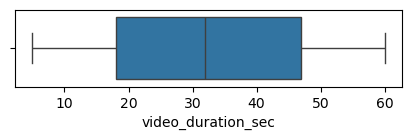

In [593]:
# Create a boxplot to visualize distribution of `video_duration_sec`
plt.figure(figsize=(5,1))
sns.boxplot(data['video_duration_sec'], orient='h');


Also, I'll create a histogram of the values in the `video_duration_sec` column to further explore the distribution of this variable.

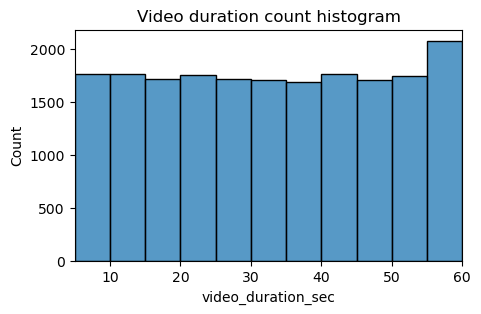

In [625]:
# Create a histogram

plt.figure(figsize=(5,3))
x = data['video_duration_sec']
x_min_value = data['video_duration_sec'].min()
x_max_value = data['video_duration_sec'].max()

sns.histplot(x, bins=range(x_min_value, x_max_value+2, 5))
plt.xlim(x_min_value, x_max_value)
plt.title("Video duration count histogram");

plt.show()


I can see that all the values of 'video_duration_sec' lie between 0.25 and 0.75 quantile, without outliers.
I noticed that all videos with different duration from 0 to 60 seconds are almost evenly represented.

#### **video_view_count**

Let's create a box plot and histogram to examine the spread of values in the `video_view_count` column.

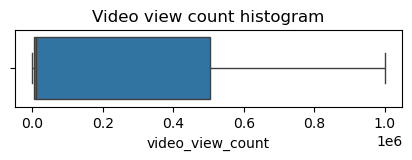

In [623]:
# Create a boxplot to visualize distribution of `video_view_count`
plt.figure(figsize=(5,1))
sns.boxplot(data['video_view_count'], orient='h')
plt.title("Video view count histogram");


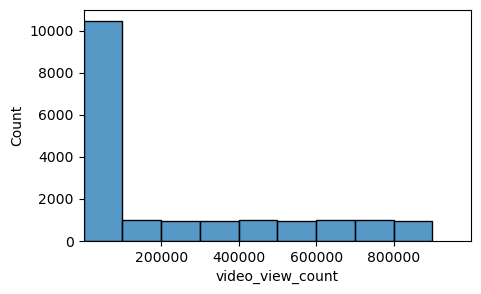

In [627]:
# Create a histogram
plt.figure(figsize=(5,3))
x = data['video_view_count']
x_min_value = int(data['video_view_count'].min())
x_max_value = int(data['video_view_count'].max())

bin_edges = range(x_min_value, x_max_value, 10**5)

sns.histplot(x, bins=bin_edges)

plt.xlim(x_min_value, x_max_value)

plt.show()


All values of 'video_view_count' lie between 0.25 and 0.75 quantile with no outliers.
It can be shown that far most frequently users view videos from 0 to 100.000 times (more than a half of all video views). After that value, the other half of video views is drastically smaller and almost constant.
I noticed extremely large interval of values from 20 to almost 1.000.000.  

#### **video_like_count**

Next, I'll create a box plot and histogram to examine the spread of values in the `video_like_count` column.

<Axes: xlabel='video_like_count'>

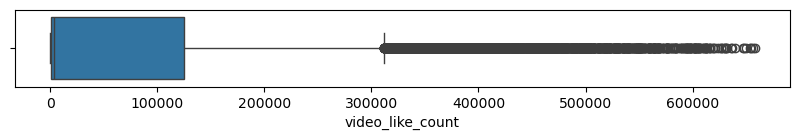

In [631]:
# Create a boxplot to visualize distribution of `video_like_count`
plt.figure(figsize=(10,1))
sns.boxplot(data['video_like_count'], orient='h')


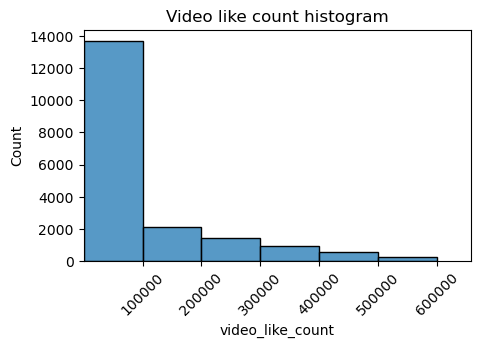

In [637]:
# Create a histogram
plt.figure(figsize=(5,3))
x = data['video_like_count']
x_min_value = int(data['video_like_count'].min())
x_max_value = int(data['video_like_count'].max())
bin_edges = range(x_min_value, x_max_value, 10**5)

# Set the x-axis labels to the bin edges
plt.xticks(bin_edges[1:], rotation=45)
sns.histplot(x, bins=bin_edges)
plt.xlim(x_min_value, x_max_value)
plt.title("Video like count histogram");
plt.show()


From the box plot, I can see a lot of outliers.
I noticed very similar distribution of this variable like 'video_view_count' - far most of the users like videos between 0 and 100.000 times.
After this value, the frequency of video likes dropps gradually. But, the distribution of the video like count is more taper compared with the distribution of video view count, decreasing toward the biggest video like counts.


#### **video_comment_count**

Let's create a box plot and histogram to examine the spread of values in the `video_comment_count` column.

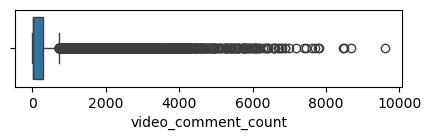

In [639]:
# Create a boxplot to visualize distribution of `video_comment_count`
plt.figure(figsize=(5,1))
sns.boxplot(data['video_comment_count'], orient='h');


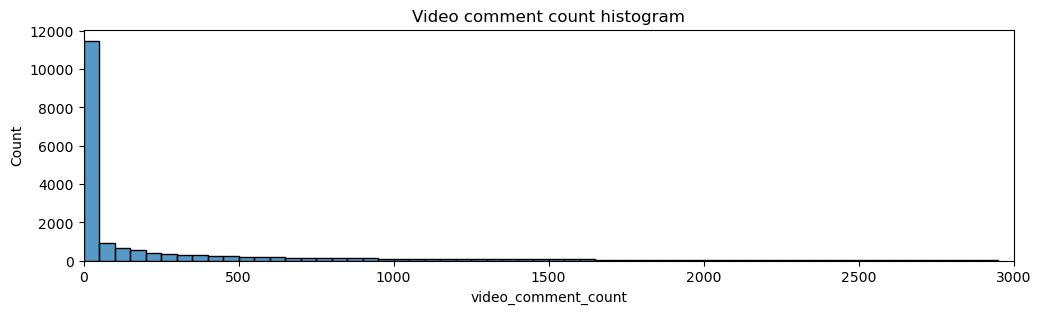

In [691]:
# Create a histogram
plt.figure(figsize=(12,3))
x = data['video_comment_count']
x_min_value = int(data['video_comment_count'].min())

x_max_value = int(data['video_comment_count'].max())

#print(data[data['video_comment_count']<=50]['video_comment_count'].count())
sns.histplot(x, bins=range(x_min_value, 3000, 50))
# Set the x-axis labels to the bin edges
#plt.xticks(bin_edges[1:], rotation=45)
plt.xlim(x_min_value, 3000)
plt.title("Video comment count histogram")
plt.show()


From the box plot, I can see a lot of outliers.
I noticed very similar distribution of this variable like the previous two - far most of the users comment videos between 0 and 100 times.
The frequency of video comments drops rapidly after 100.
The distribution is very right-skewed.
 

#### **video_share_count**

Next, I'll create a box plot and histogram to examine the spread of values in the `video_share_count` column.

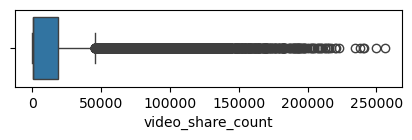

In [695]:
# Create a boxplot to visualize distribution of `video_share_count`
plt.figure(figsize=(5,1))
sns.boxplot(data['video_share_count'], orient='h');


13035


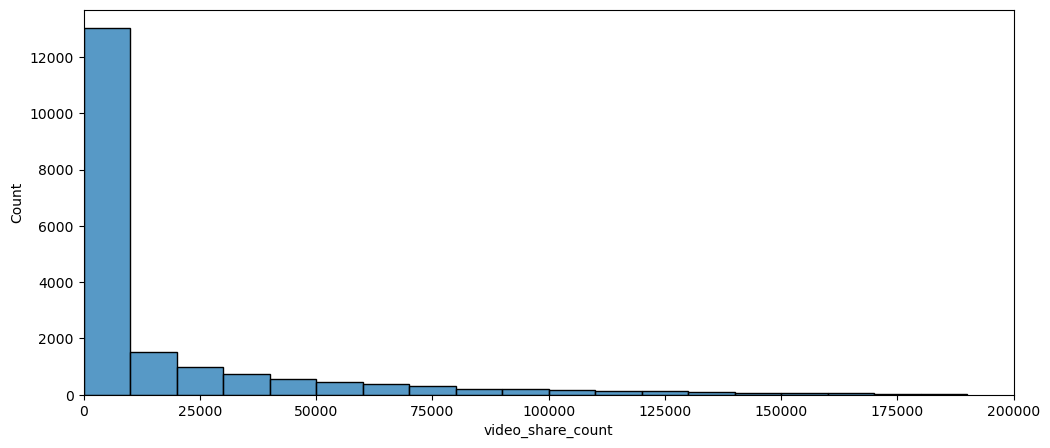

In [709]:
# Create a histogram
plt.figure(figsize=(12,5))

print(data[data['video_share_count']<=10000]['video_share_count'].count())
x = data['video_share_count']
x_min_value = int(data['video_share_count'].min())

sns.histplot(x, bins=range(x_min_value, 200000, 10000))
# Set the x-axis labels to the bin edges

plt.xlim(x_min_value, 200000)

plt.show()



From the box plot, I can see a lot of outliers.
I noticed very similar distribution of this variable like 'video_comment_count' - far most of the users share videos less than 13.000 times.
After this value, the frequency of video shares dropps gradually.

#### **video_download_count**

Next, I'll create a box plot and histogram to examine the spread of values in the `video_download_count` column.

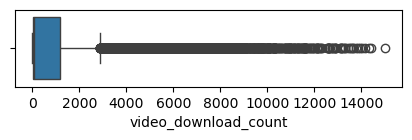

In [711]:
# Create a boxplot to visualize distribution of `video_download_count`
plt.figure(figsize=(5,1))
sns.boxplot(data['video_download_count'], orient='h');


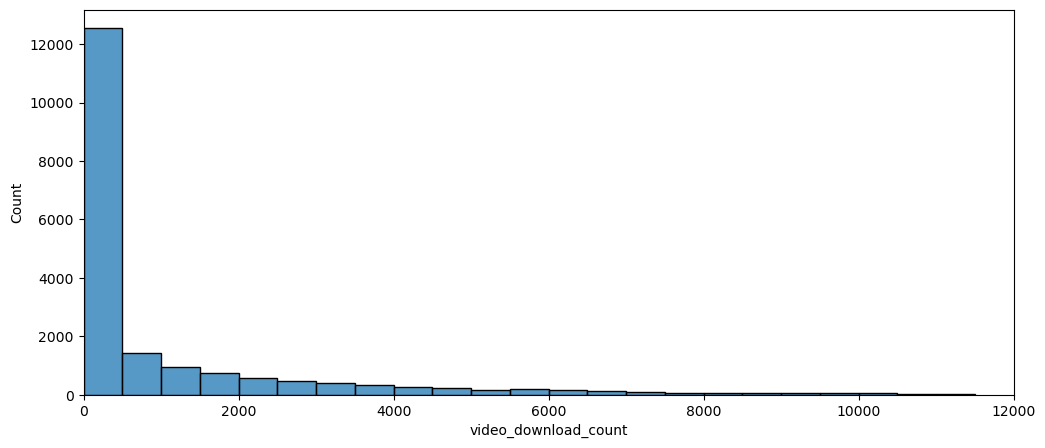

In [715]:
# Create a histogram
plt.figure(figsize=(12,5))
x = data['video_download_count']
x_min_value = int(data['video_download_count'].min())

sns.histplot(x, bins=range(x_min_value, 12000, 500))

plt.xlim(x_min_value, 12000)

plt.show()


From the box plot, I can see a lot of outliers.
I noticed very similar distribution of this variable like the previous variables - far most of the users download videos less than 500 times. But, there are users who download videos more than 12.000 times
After this value, the frequency of video shares dropps gradually.

#### **Claim status by verification status**

Now, create a histogram with four bars: one for each combination of claim status and verification status.

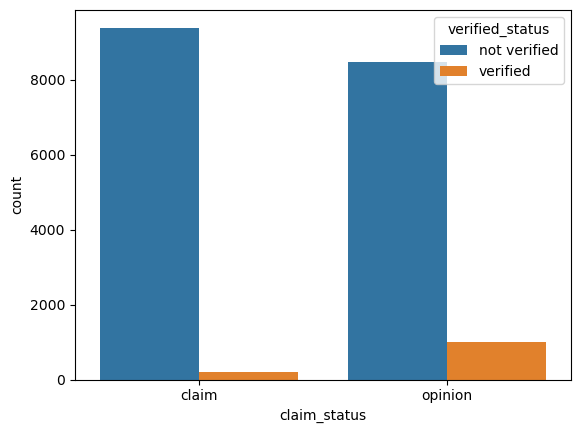

In [723]:
# Create a histogram

sns.countplot(data=data, x='claim_status', hue='verified_status');


I noticed that vast majority of users are not verified for both claim statuses.
But, if a user is verified, he is much more likely to post opinions.

#### **Claim status by author ban status**

In the previous project milestone I used a `groupby()` statement to examine the count of each claim status for each author ban status. Now, let's use a histogram to communicate the same information.

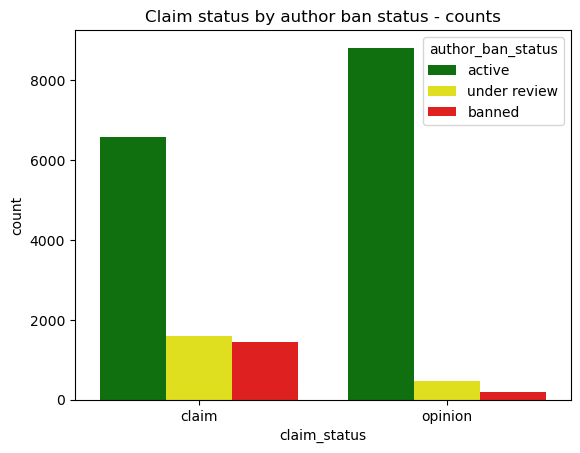

In [727]:
# Create a histogram
sns.countplot(data=data, x='claim_status', hue='author_ban_status', hue_order=['active', 'under review', 'banned'],
              palette = {'active':'green', 'under review':'yellow', 'banned':'red'})
plt.title('Claim status by author ban status - counts');

I noticed that the number of active authors compared to banned authors is far bigger for both claims and opinions.
However, the proportion of active authors is far greater for opinion videos than for claim videos. It seems that authors who post claim videos are more likely to come under review and/or get banned.

#### **Median view counts by ban status**

Next, let's create a bar plot with three bars: one for each author ban status. The height of each bar should correspond with the median number of views for all videos with that author ban status.

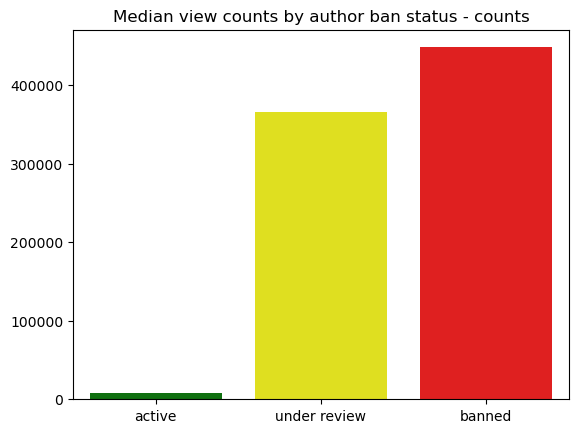

In [757]:
# Create a bar plot
median_under_review = data[data['author_ban_status']=='under review']['video_view_count'].median()

median_active = data[data['author_ban_status']=='active']['video_view_count'].median()

median_banned = data[data['author_ban_status']=='banned']['video_view_count'].median()

medians = [median_active, median_under_review, median_banned]

author_ban_status = ['active', 'under review', 'banned']

sns.barplot(x=author_ban_status, y=medians, hue=author_ban_status, palette = {'active':'green', 'under review':'yellow', 'banned':'red'})

plt.title('Median view counts by author ban status - counts');

I noticed that the median view count for banned authors are the biggest, following with the median view count of under review authors, and far smaller median view count of active authors.
Since I know that non-active authors are more likely to post claims, and that videos by non-active authors get far more views on aggregate than videos by active authors, then 'video_view_count' might be a good indicator of claim status.
Therefore, let's make quick check of the median view count by claim status:

In [769]:
# Calculate the median view count for claim status.

data.groupby('claim_status')['video_view_count'].median()


claim_status
claim      501555.0
opinion      4953.0
Name: video_view_count, dtype: float64

The median video view count for claims is 100 times bigger than that for opinions. 

#### **Total views by claim status**

In order to depicts the proportions of total views for claim videos and total views for opinion videos, I'll create a pie graph.

9608
9476


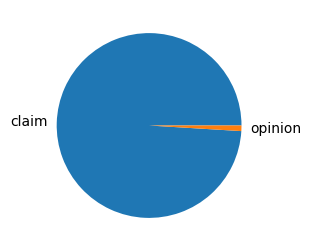

In [783]:
# Create a pie graph
plt.figure(figsize=(3,3))
total_views_claim = data[data['claim_status'] == 'claim']['video_view_count'].sum()

total_claim = data[data['claim_status'] == 'claim']['claim_status'].count()
print(total_claim)

total_opinion = data[data['claim_status'] == 'opinion']['claim_status'].count()
print(total_opinion)

total_views_opinion = data[data['claim_status'] == 'opinion']['video_view_count'].sum()

total_views = [total_views_claim, total_views_opinion]

plt.pie(total_views, labels=['claim', 'opinion']);



The overall view count for claim status is 99% of all video view counts, even though there are roughly the same number of each video in the dataset (9608 claim videos and 9476 opinion videos).

### **Task 4. Determine outliers**

Trying to predict the view count of a particular video, videos with extremely high view counts might introduce bias to a model. Also, some outliers might indicate problems with how data was captured or recorded.

The analysis I've performed so far indicates that a video's engagement level is strongly correlated with its claim status. There's no reason to believe that any of the values in the dataset are erroneously captured, and they align with expectation of how social media works: a very small proportion of videos get super high engagement levels, because that's the nature of the viral content.

Nonetheless, it's good practice to get a sense of just how many of ther data points could be considered outliers. The definition of an outlier can change based on the details of the project, and it helps to have domain expertise to decide a threshold. A common way to determine outliers in a normal distribution is to calculate the interquartile range (IQR) and set a threshold that is 1.5 * IQR above the 3rd quartile.

In this dataset, the values for the count variables are not normally distributed. They are heavily skewed to the right. One way of modifying the outlier threshold is by calculating the **median** value for each variable and then adding 1.5 * IQR. This results in a threshold that is, in this case, much lower than it would be if I used the 3rd quartile.

Therefore, I'll write a for loop that iterates over the column names of each count variable. For each iteration:
1. Calculate the IQR of the column
2. Calculate the median of the column
3. Calculate the outlier threshold (median + 1.5 * IQR)
4. Calculate the number of videos with a count in that column that exceeds the outlier threshold
5. Print "Number of outliers, {column name}: {outlier count}"

```
Example:
Number of outliers, video_view_count: ___
Number of outliers, video_like_count: ___
Number of outliers, video_share_count: ___
Number of outliers, video_download_count: ___
Number of outliers, video_comment_count: ___
```

In [789]:
count_columns = ['video_view_count', 'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count']

for col in count_columns:
    iqr = np.nanquantile(data[col], 0.75) - np.nanquantile(data[col], 0.25)
    median_value = data[col].median()
    outlier_treshold = median_value + 1.5 * iqr
        
    print('Number of outliers,', col, ":", (data[col] > outlier_treshold).sum())
    

Number of outliers, video_view_count : 2343
Number of outliers, video_like_count : 3468
Number of outliers, video_share_count : 3732
Number of outliers, video_download_count : 3733
Number of outliers, video_comment_count : 3882


#### **Scatterplot**

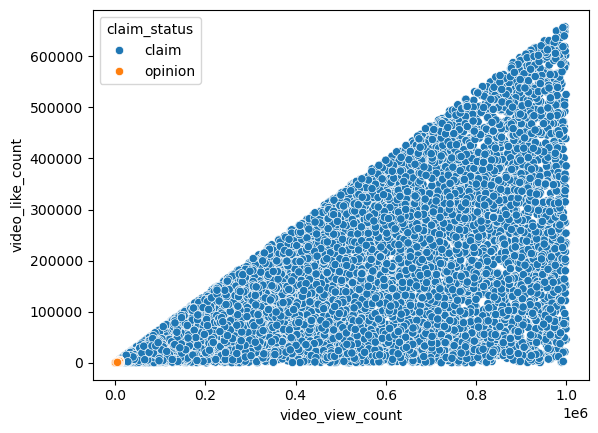

In [791]:
# Create a scatterplot of `video_view_count` versus `video_like_count` according to 'claim_status'
sns.scatterplot(x=data['video_view_count'], y=data['video_like_count'], hue=data['claim_status'], legend='auto');


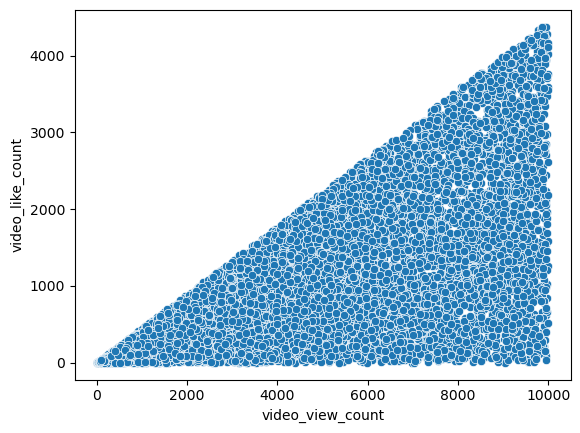

In [557]:
# Create a scatterplot of ``video_view_count` versus `video_like_count` for opinions only
opinions = data[data['claim_status'] == 'opinion']

sns.scatterplot(x=opinions['video_view_count'], y=opinions['video_like_count'], legend='auto');


### **Task 5a. Results and evaluation**

Having built visualizations in Tableau and in Python, I examined the data distribution/spread, count frequencies, mean and median values, extreme values/outliers, missing data, and more. I analyzed correlations between variables, particularly between the claim_status variable and others.

I want to further investigate distinctive characteristics that apply only to claims or only to opinions. Also, I want to consider other variables that might be helpful in understanding the data.

My client would want to know the assumptions regarding what data might be predictive of claim_status. He would also like profesional and presentable results, making sure that my visualizations are clean, easily understandable, accessible, and also considering color, contrast, emphasis, and labeling.


### **Task 5b. Conclusion**
*I must make the conclusion professional and presentable*

After I have visualized the data, I need to share the visualizations with the client. The goal of a data visualization is for an audience member to glean the information on the chart in mere seconds.

Visualizations helped me understand that I'll need to make decisions on certain considerations prior to designing a model (for example, what to do with outliers, duplicate values, or missing data).